# Edge Detection Test

This notebook tests the edge detection algorithm.

## Import all the things

Import regular packages

In [1]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [2]:
%matplotlib inline

import cv2
from scipy import signal
import numpy as np
from cmath import pi

Add relative path

In [3]:
import sys
import os
sys.path.append(os.path.join('..','Scripts'))

Import Diffraction Tool

In [4]:
from DiffractionTool import PhaseTypeHologram
from DiffractionTool import PatternGenerator
from DiffractionTool import HelperFunctions as hp

#### Paramters

In [5]:
N_size=3335
#μm plane [1000,1000]μm 
interval=0.3
waveLambda=0.6328
z=400
k=2.0*pi/waveLambda
actualSize=N_size*interval
xyInterval=[interval]*2
hologramRadius=100

#### Original Image

In [6]:
currentPath=os.getcwd()
dataPath=os.path.join(currentPath,"data")
filename='maki.png'
#filename='Prob3Data.png'

In [7]:
grayImg=cv2.imread(os.path.join(dataPath,filename),cv2.IMREAD_GRAYSCALE)
grayImg=cv2.flip(grayImg,0)
imgActualSize=1000
imgNSize=grayImg.shape[0]
grayImg=grayImg/np.max(np.abs(grayImg))

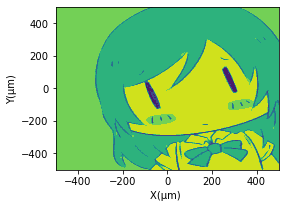

In [8]:
labels=['X(μm) ','Y(μm)']
range=[[-imgActualSize/2.0,imgActualSize/2.0]]*2
hp.displace_2d(grayImg,labels,range)

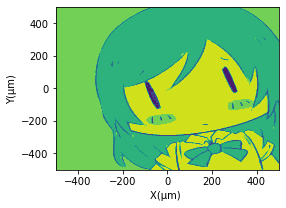

In [9]:
padSize=int((actualSize/(imgActualSize)*imgNSize-imgNSize)/2)
targetImg=cv2.copyMakeBorder(grayImg,padSize,padSize,padSize,padSize,cv2.BORDER_CONSTANT,value=0)
targetImg=cv2.resize(targetImg,(N_size,N_size))
labels=['X(μm) ','Y(μm)']
range=[[-actualSize/2.0,actualSize/2.0]]*2
hp.displace_2d(targetImg,labels,range)

In [10]:
print(targetImg.shape)

(3335, 3335)


#### Define a kernel

In [11]:
edgeFilter_scharr=np.array([[ -3-3j, 0-10j,  +3 -3j],[-10+0j, 0+ 0j, +10 +0j],[ -3+3j, 0+10j,  +3 +3j]])

In [12]:
print(edgeFilter_scharr)

[[ -3. -3.j   0.-10.j   3. -3.j]
 [-10. +0.j   0. +0.j  10. +0.j]
 [ -3. +3.j   0.+10.j   3. +3.j]]


In [39]:
s2=np.sqrt(2)
edgeFilter_center=10*np.array([[-s2,-1,-s2],[-1,4*(1+s2),-1],[-s2,-1,-s2]])

In [40]:
print(edgeFilter_center)

[[-14.14213562 -10.         -14.14213562]
 [-10.          96.56854249 -10.        ]
 [-14.14213562 -10.         -14.14213562]]


#### Edge detection result

Scharr

In [14]:
resImg=signal.convolve2d(targetImg,edgeFilter_scharr,mode='same')

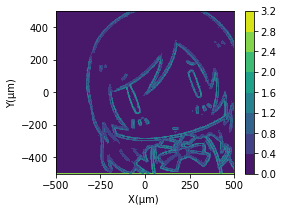

In [15]:
labels=['X(μm) ','Y(μm)']
range=[[-actualSize/2.0,actualSize/2.0]]*2
hp.displace_2d(np.log(np.absolute(resImg)+1),labels,range,enableColorBar=True)

Center

In [41]:
resImg=signal.convolve2d(targetImg,edgeFilter_center,mode='same')

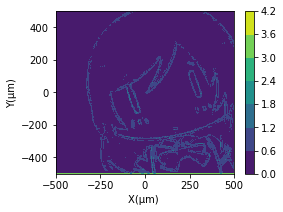

In [42]:
labels=['X(μm) ','Y(μm)']
range=[[-actualSize/2.0,actualSize/2.0]]*2
hp.displace_2d(np.log(np.absolute(resImg)+1),labels,range,enableColorBar=True)